In [118]:
import torch
import torchvision
import torchvision.transforms as transforms

In [103]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root = './data', train = True,
                                        download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size,
                                          shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root = './data', train = False,
                                       download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size,
                                         shuffle = False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


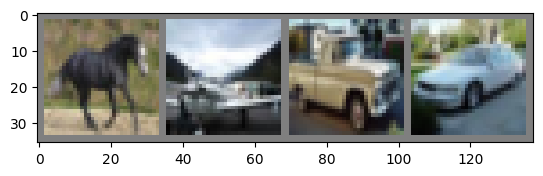

horse plane truck car  


In [119]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(img):
    img  = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(" ".join(f"{classes[labels[j]]:5s}" for j in range(batch_size)))

In [120]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):  # Corrected the class inheritance
    def __init__(self, dropout_prob=0.5):
        super().__init__()

        
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)

        # Fully connected layers
        self.fc1 = nn.Linear(14 * 14 * 6, 512) # Fixed 'linear' to 'Linear' and using convolutions.
        #self.fc1 = nn.Linear(32 * 32 * 3, 512)  # Fixed 'linear' to 'Linear'
        self.bn1 = nn.BatchNorm1d(512)  # Batch normalization after the first fc layer
        self.dropout1 = nn.Dropout(p = dropout_prob)
        
        self.fc2 = nn.Linear(512, 256)  # Fixed 'linear' to 'Linear'
        self.bn2 = nn.BatchNorm1d(256)  # Batch normalization after the second fc layer
        
        self.fc3 = nn.Linear(256, 128)  # Fixed 'linear' to 'Linear'
        self.bn3 = nn.BatchNorm1d(128)  # Batch normalization after the third fc layer
        self.dropout2 = nn.Dropout(p = dropout_prob)  # Corrected dropout reference
        
        self.fc4 = nn.Linear(128, 10)  # Fixed 'linear' to 'Linear'
        
    def forward(self, x):

        
        x = self.pool(F.relu(self.conv1(x)))
        x = torch.flatten(x, 1)  # Flatten the input to stay just in 2 dimensions.

        # First fully connected layer
        x = self.bn1(self.fc1(x))  # Apply BatchNorm before activation
        x = F.leaky_relu(x, negative_slope = 0.01)  # LeakyReLU activation
        x = self.dropout1(x)  # Apply dropout

        # Second fully connected layer
        x = self.bn2(self.fc2(x))  # Apply BatchNorm before activation
        x = F.leaky_relu(x, negative_slope = 0.01)

        # Third fully connected layer
        x = self.bn3(self.fc3(x))
        x = F.leaky_relu(x, negative_slope = 0.01)
        x = self.dropout2(x)  

        # Final output layer
        x = self.fc4(x)
        x = F.softmax(x, dim = 1)  # Apply Softmax for multi-class classification
        return x
net = Net()

In [106]:
"""
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):  
    def __init__(self, dropout_prob=0.5):
        super().__init__()
        
        # Fully connected layers
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.bn1 = nn.BatchNorm1d(512)  # Batch normalization after the first fc layer
        self.dropout1 = nn.Dropout(p=dropout_prob)
        
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)  # Batch normalization after the second fc layer
        
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)  # Batch normalization after the third fc layer
        self.dropout2 = nn.Dropout(p=dropout_prob)  # Corrected dropout reference
        
        self.fc4 = nn.Linear(128, 10)  # Output layer
        
    def forward(self, x):
        x = torch.flatten(x, 1)  # Flatten the input to stay just in 2 dimensions.

        # First fully connected layer
        x = self.bn1(self.fc1(x))  # Apply BatchNorm before activation
        x = torch.sigmoid(x)  # Sigmoid activation
        x = self.dropout1(x)  # Apply dropout

        # Second fully connected layer
        x = self.bn2(self.fc2(x))  # Apply BatchNorm before activation
        x = torch.sigmoid(x)  # Sigmoid activation

        # Third fully connected layer
        x = self.bn3(self.fc3(x))  # Apply BatchNorm before activation
        x = torch.sigmoid(x)  # Sigmoid activation
        x = self.dropout2(x)  # Apply dropout

        # Final output layer (softmax for multi-class classification)
        x = self.fc4(x)
        x = F.softmax(x, dim=1)  # Apply Softmax for multi-class classification
        return x
"""

'\nimport torch.nn as nn\nimport torch.nn.functional as F\n\nclass Net(nn.Module):  \n    def __init__(self, dropout_prob=0.5):\n        super().__init__()\n        \n        # Fully connected layers\n        self.fc1 = nn.Linear(32 * 32 * 3, 512)\n        self.bn1 = nn.BatchNorm1d(512)  # Batch normalization after the first fc layer\n        self.dropout1 = nn.Dropout(p=dropout_prob)\n        \n        self.fc2 = nn.Linear(512, 256)\n        self.bn2 = nn.BatchNorm1d(256)  # Batch normalization after the second fc layer\n        \n        self.fc3 = nn.Linear(256, 128)\n        self.bn3 = nn.BatchNorm1d(128)  # Batch normalization after the third fc layer\n        self.dropout2 = nn.Dropout(p=dropout_prob)  # Corrected dropout reference\n        \n        self.fc4 = nn.Linear(128, 10)  # Output layer\n        \n    def forward(self, x):\n        x = torch.flatten(x, 1)  # Flatten the input to stay just in 2 dimensions.\n\n        # First fully connected layer\n        x = self.bn1(sel

In [121]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [87]:
train_losses = []
train_accuracies = []

for epoch in range(10):
    running_loss = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data # separating the data.
        optimizer.zero_grad()

        outputs = net(inputs) # forward step and predicting the output.

        _, predicted = torch.max(outputs, 1)  # Get the predicted class
        total += labels.size(0)  # Increment total by the batch size
        correct += (predicted == labels).sum().item()  # Increment correct by the number of correct predictions
        
        loss = criterion(outputs, labels) # Putting the error backward
        loss.backward() # Make the backward loss
        optimizer.step() # Step my backpropagation

        running_loss += loss.item()
        if i % 2000 == 1999:
            avg_loss = running_loss / 2000
            avg_accuracy = 100 * correct / total  # Calculate the accuracy
            train_losses.append(avg_loss)
            train_accuracies.append(avg_accuracy)
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {avg_loss:.3f}, accuracy: {avg_accuracy:.2f}%')
            running_loss = 0
print("Finished training")

[1,  2000] loss: 2.270, accuracy: 32.29%
[1,  4000] loss: 2.230, accuracy: 31.11%
[1,  6000] loss: 2.202, accuracy: 30.51%
[1,  8000] loss: 2.187, accuracy: 30.20%
[1, 10000] loss: 2.170, accuracy: 30.05%
[1, 12000] loss: 2.161, accuracy: 30.04%
[2,  2000] loss: 2.147, accuracy: 30.16%
[2,  4000] loss: 2.143, accuracy: 30.25%
[2,  6000] loss: 2.136, accuracy: 30.37%
[2,  8000] loss: 2.126, accuracy: 30.54%
[2, 10000] loss: 2.126, accuracy: 30.68%
[2, 12000] loss: 2.116, accuracy: 30.87%
[3,  2000] loss: 2.112, accuracy: 31.07%
[3,  4000] loss: 2.111, accuracy: 31.23%
[3,  6000] loss: 2.111, accuracy: 31.39%
[3,  8000] loss: 2.098, accuracy: 31.57%
[3, 10000] loss: 2.107, accuracy: 31.72%
[3, 12000] loss: 2.100, accuracy: 31.88%
[4,  2000] loss: 2.087, accuracy: 32.12%
[4,  4000] loss: 2.086, accuracy: 32.31%
[4,  6000] loss: 2.086, accuracy: 32.48%
[4,  8000] loss: 2.078, accuracy: 32.67%
[4, 10000] loss: 2.080, accuracy: 32.82%
[4, 12000] loss: 2.078, accuracy: 32.99%
[5,  2000] loss:

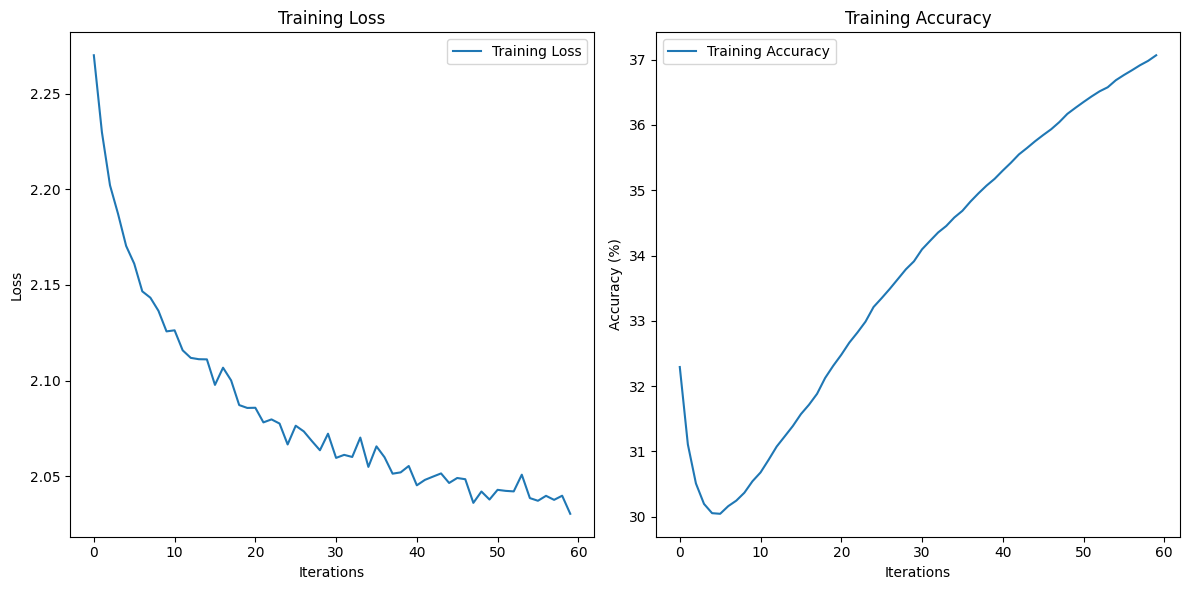

In [88]:
# Plot the training loss and accuracy
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [89]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### Testing the data.

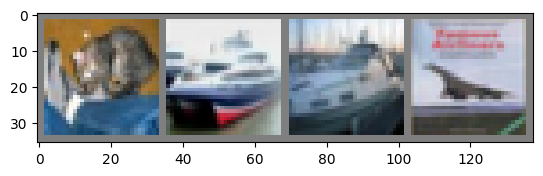

GroundTruth:  cat   ship  ship  plane


In [90]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [91]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))
outputs = net(images)

In [92]:
outputs = net(images)

In [93]:
_, predicted = torch.max(outputs, 1)

print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

GroundTruth:  cat   ship  ship  plane
Predicted:  frog  car   horse plane


Accuracy of the network on the 10000 test images: 41 %


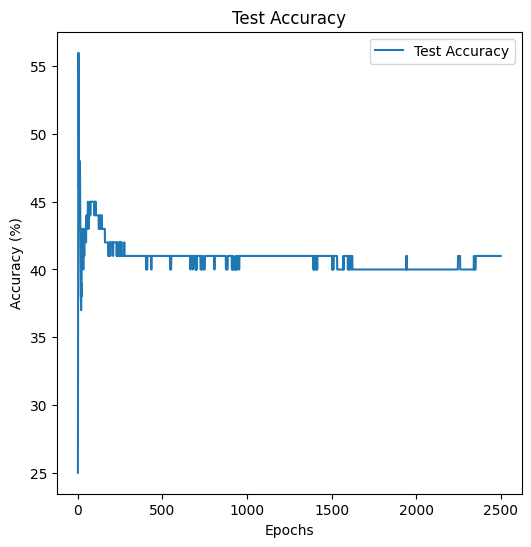

In [96]:
test_accuracies = []


correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data

        outputs = net(images)

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        test_accuracy = 100 * correct // total
        test_accuracies.append(test_accuracy)
        
print(f'Accuracy of the network on the 10000 test images: {test_accuracy} %')

# Plot test accuracy
plt.figure(figsize=(6, 6))
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.legend()
plt.show()

In [95]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data

        outputs = net(images)

        _, predictions = torch.max(outputs, 1)
        
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
        
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 54.8 %
Accuracy for class: car   is 59.3 %
Accuracy for class: bird  is 27.8 %
Accuracy for class: cat   is 0.0 %
Accuracy for class: deer  is 32.5 %
Accuracy for class: dog   is 43.7 %
Accuracy for class: frog  is 57.0 %
Accuracy for class: horse is 42.7 %
Accuracy for class: ship  is 47.7 %
Accuracy for class: truck is 42.0 %


### Extracting the layers from a CNN to have a more representative data!

In [129]:
# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified


In [133]:
class SimpleCNN(nn.Module):
    def __init__(self, embedding_dim=128):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        # Adjusted for 128x4x4 input size
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, embedding_dim)
        self.fc3 = nn.Linear(embedding_dim, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.relu(self.fc1(x))
        embedding = torch.relu(self.fc2(x))
        x = self.fc3(embedding)
        return x, embedding


In [134]:
# Initialize the CNN model
model = SimpleCNN()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [136]:
# Training the model
for epoch in range(1):  # Number of epochs
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        #print(data)
        #break
        inputs, labels = data
        optimizer.zero_grad()

        # Forward pass
        outputs, embeddings = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 1000 == 999:  # Print every 1000 mini-batches
            print(f"Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 1000:.3f}")
            running_loss = 0.0

print('Finished Training')


Epoch 1, Batch 1000, Loss: 1.397
Epoch 1, Batch 2000, Loss: 1.362
Epoch 1, Batch 3000, Loss: 1.328
Epoch 1, Batch 4000, Loss: 1.301
Epoch 1, Batch 5000, Loss: 1.236
Epoch 1, Batch 6000, Loss: 1.208
Epoch 1, Batch 7000, Loss: 1.147
Epoch 1, Batch 8000, Loss: 1.142
Epoch 1, Batch 9000, Loss: 1.153
Epoch 1, Batch 10000, Loss: 1.124
Epoch 1, Batch 11000, Loss: 1.045
Epoch 1, Batch 12000, Loss: 1.042
Finished Training


In [137]:
print(outputs.shape)  # Check the shape of the model's output
print(labels.shape)   # Check the shape of the labels


torch.Size([4, 10])
torch.Size([4])


In [138]:
# Get embeddings for the test set
model.eval()  # Set model to evaluation mode
all_embeddings = []
all_labels = []

with torch.no_grad():  # No need to track gradients
    for data in testloader:
        images, labels = data
        outputs, embeddings = model(images)
        all_embeddings.append(embeddings)
        all_labels.append(labels)

# Convert to tensors for further analysis
all_embeddings = torch.cat(all_embeddings)
all_labels = torch.cat(all_labels)

print(f"Embeddings shape: {all_embeddings.shape}")  # (num_samples, embedding_dim)


Embeddings shape: torch.Size([10000, 128])


In [139]:
# Access the weights of the last fully connected layer (fc3)
fc3_weights = model.fc3.weight.data.numpy()

# The shape of fc3_weights will be [10, 128] (10 output classes, 128 input features)
print(fc3_weights.shape)

# Now you can use the weights for various purposes, such as clustering, visualization, etc.


(10, 128)


In [142]:
# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self, embedding_dim=128):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, embedding_dim)  # Embedding layer
        self.fc3 = nn.Linear(embedding_dim, 10)  # Output layer for classification

    def forward(self, x, return_embedding=False):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.relu(self.fc1(x))
        embedding = torch.relu(self.fc2(x))
        output = self.fc3(embedding)
        if return_embedding:
            return output, embedding
        return output

In [143]:
# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [144]:
# Train the CNN
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
cnn_model = SimpleCNN(embedding_dim=128).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)


In [146]:
print("Training CNN...")
for epoch in range(1):  # Train for 5 epochs
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = cnn_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(trainloader):.4f}")

print("Finished training CNN.")

Training CNN...
Epoch 1, Loss: 1.2536
Finished training CNN.


In [147]:
# Save trained CNN
torch.save(cnn_model.state_dict(), 'cnn_cifar10.pth')

# Extract embeddings
cnn_model.eval()  # Set model to evaluation mode
all_embeddings = []
all_labels = []

print("Extracting embeddings...")
with torch.no_grad():
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        _, embeddings = cnn_model(inputs, return_embedding=True)
        all_embeddings.append(embeddings)
        all_labels.append(labels)

all_embeddings = torch.cat(all_embeddings).cpu()
all_labels = torch.cat(all_labels).cpu()
print(f"Embeddings shape: {all_embeddings.shape}")

Extracting embeddings...
Embeddings shape: torch.Size([50000, 128])


In [171]:
import torch
import torch.nn as nn

class DeepNN(nn.Module):
    def __init__(self, embedding_dim=256, input_size=128):
        super(DeepNN, self).__init__()

        # Fully Connected Layers
        self.fc1 = nn.Linear(input_size, 1024)  # Input size is now 128, configurable
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, embedding_dim)  # Embedding layer
        self.fc5 = nn.Linear(embedding_dim, 10)  # Output layer for classification

        # Dropout for regularization
        self.dropout = nn.Dropout(0.5)

    def forward(self, x, return_embedding=False):
        # If the input is a batch of CIFAR-10 images, flatten them
        # If the input is already a vector, skip flattening
        if len(x.shape) > 2:
            x = x.view(x.size(0), -1)  # Flatten the input tensor (CIFAR-10)

        # Fully connected layers with ReLU activation and Dropout for regularization
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)  # Apply dropout to the activations

        embedding = torch.relu(self.fc4(x))  # Embedding layer
        output = self.fc5(embedding)  # Output layer for classification

        if return_embedding:
            return output, embedding
        return output


In [172]:
# Split embeddings into training and validation sets
from sklearn.model_selection import train_test_split
train_embeddings, val_embeddings, train_labels, val_labels = train_test_split(
    all_embeddings, all_labels, test_size=0.2, random_state=42
)

In [173]:
# Example of how to instantiate the model
deep_model = DeepNN(embedding_dim=256)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(deep_model.parameters(), lr=0.001)

train_data = torch.utils.data.TensorDataset(train_embeddings, train_labels)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)

val_data = torch.utils.data.TensorDataset(val_embeddings, val_labels)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False)

In [174]:
print("Training feedforward neural network...")
for epoch in range(10):  # Train for 10 epochs
    deep_model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = deep_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}")

Training feedforward neural network...
Epoch 1, Loss: 1.0970
Epoch 2, Loss: 1.0210
Epoch 3, Loss: 1.0077
Epoch 4, Loss: 0.9930
Epoch 5, Loss: 0.9814
Epoch 6, Loss: 0.9749
Epoch 7, Loss: 0.9655
Epoch 8, Loss: 0.9610
Epoch 9, Loss: 0.9521
Epoch 10, Loss: 0.9423


In [175]:
# Initialize lists to store the loss and accuracy values for each epoch
train_losses = []
train_accuracies = []

print("Training feedforward neural network...")
for epoch in range(10):  # Train for 10 epochs
    deep_model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        
        # Forward pass
        outputs = deep_model(inputs)
        
        # Calculate the loss
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        # Update running loss
        running_loss += loss.item()
        
        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
    
    # Calculate average loss and accuracy for this epoch
    avg_loss = running_loss / len(train_loader)
    accuracy = correct_predictions / total_predictions * 100
    
    # Store loss and accuracy values for plotting
    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)
    
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

Training feedforward neural network...
Epoch 1, Loss: 0.9374, Accuracy: 67.08%
Epoch 2, Loss: 0.9331, Accuracy: 67.18%
Epoch 3, Loss: 0.9260, Accuracy: 67.41%
Epoch 4, Loss: 0.9206, Accuracy: 67.68%
Epoch 5, Loss: 0.9127, Accuracy: 67.52%
Epoch 6, Loss: 0.9071, Accuracy: 67.76%
Epoch 7, Loss: 0.8992, Accuracy: 67.83%
Epoch 8, Loss: 0.8938, Accuracy: 68.18%
Epoch 9, Loss: 0.8888, Accuracy: 68.22%
Epoch 10, Loss: 0.8752, Accuracy: 68.44%


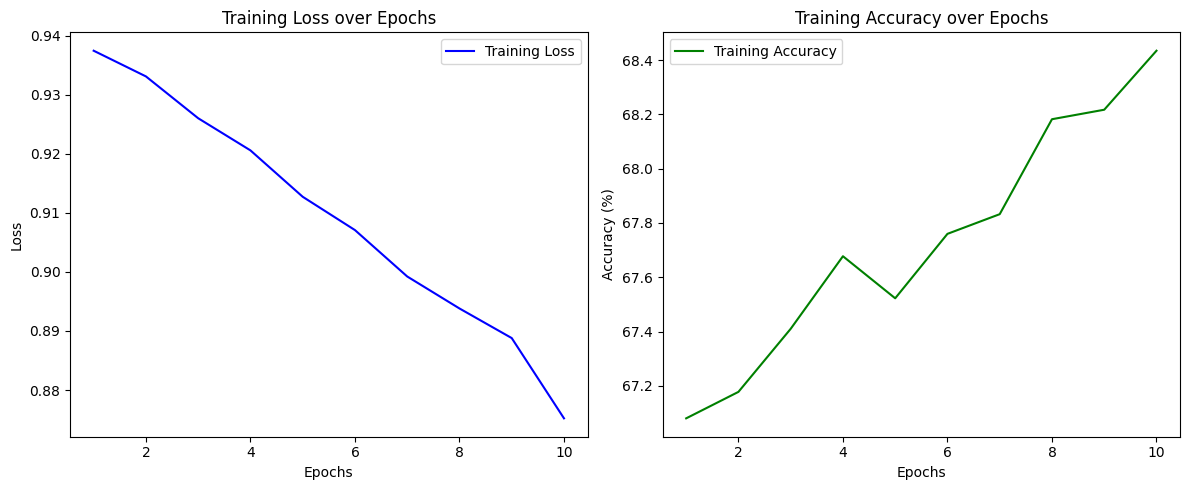

In [176]:
# Plotting the loss and accuracy
epochs = range(1, 11)
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [177]:
from sklearn.metrics import confusion_matrix

# Function to test the model and create a confusion matrix
def test_model(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    
    correct_predictions = 0
    total_predictions = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():  # No need to calculate gradients during testing
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            # Update the total correct predictions and total samples
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)
            
            # Store predictions and labels for the confusion matrix
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Calculate accuracy
    accuracy = correct_predictions / total_predictions * 100
    print(f"Test Accuracy: {accuracy:.2f}%")
    
    # Create confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
# Train the CNN
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
cnn_model = SimpleCNN(embedding_dim=128).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)




In [182]:

# Load the test dataset (for example CIFAR-10)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create the DataLoader for the test dataset
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

# Ensure that 'device' is defined (use 'cuda' if you are using GPU, 'cpu' otherwise)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test_model(deep_model, test_loader, device)


Files already downloaded and verified


RuntimeError: mat1 and mat2 shapes cannot be multiplied (128x3072 and 128x1024)

In [180]:
import pandas as pd

# Convert the embeddings and labels to pandas DataFrames
embeddings_df = pd.DataFrame(all_embeddings.cpu().numpy())  # Convert to numpy and create DataFrame
labels_df = pd.DataFrame(all_labels.cpu().numpy(), columns=['label'])  # Ensure it's a column vector

# Save to CSV
embeddings_df.to_csv('embeddings.csv', index=False)
labels_df.to_csv('labels.csv', index=False)

print("Embeddings and labels saved to CSV!")


Embeddings and labels saved to CSV!
